























___
# MINIPROJETO 1

## Maria Clara Lorenzetti Luques
___

## Número de chegadas de turistas internacionais (apenas no mês de janeiro, por via aérea, chegando no estado de São Paulo, de 2010 a 2015, separadas por países)

___
### Itens 1 a 3 - Resolução:

In [21]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
from numpy import arange

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\MLUQUES\Documents\Insper\Semestre 2\Ciência dos Dados\MiniProjeto1


In [22]:
dados = pd.read_csv('spchegadas.csv',encoding='windows-1252', sep=";")

In [23]:
chegadas = dados.Chegadas
desc = chegadas.describe()
desc

count      336.000000
mean      2822.244048
std       5571.811796
min          0.000000
25%        293.000000
50%       1036.000000
75%       2896.500000
max      48411.000000
Name: Chegadas, dtype: float64

In [46]:
media = desc[1]
pquad = desc[4]
mediana = desc[5]
tquad = desc[6]

2822.2440476190477

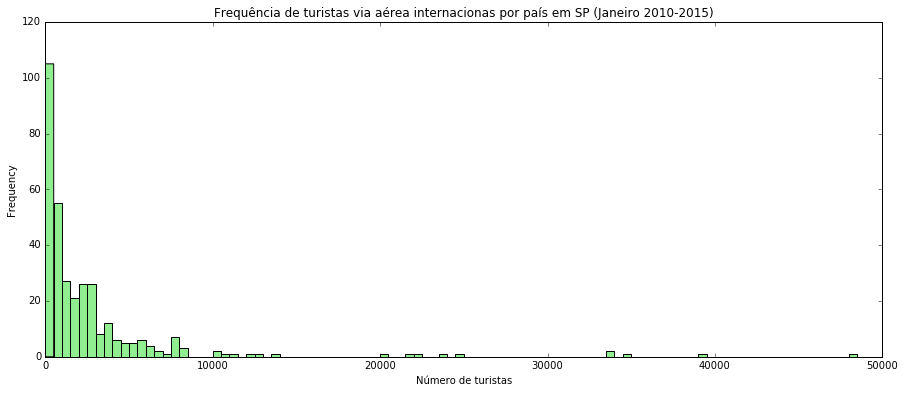

In [44]:
faixa = arange(0,50000,500)
chegadas.plot.hist(bins=faixa, color='lightgreen', figsize=(15,6))
plt.xlabel('Número de turistas')
plt.title('Frequência de turistas via aérea internacionas por país em SP (Janeiro 2010-2015)')
plt.show()

___
### Itens 4 a 6 - Resolução:

Exponencial negativa e assismetria positiva.

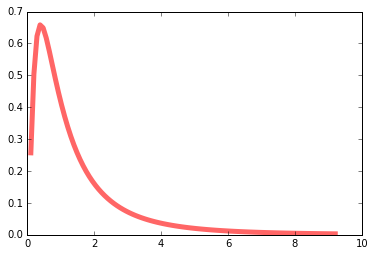

In [50]:
s = 0.954
x = np.linspace(stats.lognorm.ppf(0.01, s),
                stats.lognorm.ppf(0.99, s), 100)
plt.plot(x, stats.lognorm.pdf(x, s),
       'r-', lw=5, alpha=0.6, label='lognorm pdf')

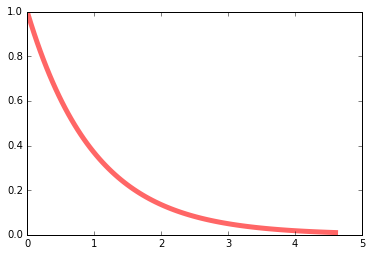

In [52]:
x = np.linspace(stats.expon.ppf(0.01),
                stats.expon.ppf(0.99), 100)
plt.plot(x, stats.expon.pdf(x),
       'r-', lw=5, alpha=0.6, label='expon pdf')

___
### Itens 7 a 9 - Resolução:

___
### Itens 10 e 11 - Resolução: